# Лабораторная работа 1
# Задача о падении тела. Построение графиков функции

Корзун В. А. Вариант 3 05.02.2024

# Задание 1.1. Задача о падении тела

**Постановка задачи**. Тело запущено под углом $\alpha$ к горизонту на
высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное
на расстоянии $s_{end}$ и высоте $h_{end}$. Тело будем считать материальной точкой массы. Движение запущенного тела осуществляется только под действием силы тяжести
<h4 align="center">$\textbf{F}=\textit{m (0, -g)}$</h4>
где <i>m</i> — масса тела, <i>g</i> — ускорение свободного падения. Сопротивлением среды
пренебрегаем.

**Данные**. Задача рассматривается при следующих значениях параметров: $h_{start}=10$m, $h_{end}=30$m, $T=3$ s, $s_{end}=50$ m. Начальный момент времени движения тела полагаем равным нулю: $t=0$. Значение массы тела не влияет на функции перемещения тела.

**Задания для выполнения**. $\color{red}{Определите}$ функцию
перемещения тела $(s_{x}(t),s_{y}(t))$ под действием силы тяжести, где
$s_{x}(t)$ и $s_{y}(t)$ — горизонтальная и вертикальная составляющая
положения тела в момент времени $t$, соответственно. $\color{red}{Найдите}$ угол
запуска тела $\alpha$. $\color{red}{Постройте}$ график траектории движения тела $(s_x(t),s_y(t))$ для $t\in [0,T]$.

## Выполнение задания 1.1

### Этап 1. Импортирование модулей

Импортируем модуль <i>math</i> с математическими функциями из стандартной бибоиотеки

In [1]:
import math

Доступ к инструментам модуля осуществляется с применением синтаксиса уточнения
<имя модуля>.<имя атрибута>. Например:

In [2]:
math.sin(math.pi/2)

1.0

Импортируем расширение numpy и создадим псевдоним np для доступа к
инструментам модуля, не используя имя numpy

In [3]:
import numpy as np

Расширение numpy основано на работе со структурой данных массив ( ndarray ).
Массив ( ndarray ) не является встроенным типом данных Python, он является базовым
типом расширения numpy .

Импортируем модуль pyplot из пакета matplotlib для построения графиков. Для
этого примененим синтаксис <имя пакета>.<имя модуля в пакете> и создадим
псевдоним имени модуля plt

In [4]:
import matplotlib.pyplot as plt

Импортируем модуль constants из пакета расширений scipy с псевдонимом
const . Модуль constants предоставляет доступ к значениям физических констант

In [5]:
import scipy.constants as const

Импортируем модуль sympy для символьных вычислений в Python

In [6]:
import sympy

### Этап 2. Создание переменных

**Переменные** создаются при первом присваивании им значений. Слева от оператора присваивания ( = ) записывается переменная, справа — выражение, результатом вычисления которого является объект: переменная = объект . Имена переменных рекомендовано задавать в нижнем регистре с использованием знака нижнего подчеркивания для смыслового разделения имени на части, например first_variable = 1 . Объявлять переменные перед их инициализацией не нужно.

После присваивания всякий раз, когда переменная появляется в коде, она заменяется
на объект, на который ссылается. Нельзя использовать переменную, которой не
присвоено значение.

In [7]:
h_start = 10 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+1 # вертикальная составляющая положения тела в конечный момент движения
T = 3.0 # время полета
s_end = 5.0e1 # горизонтальное перемещение тела за время полета

Отобразить значение переменной можно указав ее имя в ячейке ввода в последней
строке или с использованием встроенной функции print

In [8]:
h_start # переменная не в конце, не отобразится
h_end # А эта да

30.0

In [9]:
print(h_start, h_end)

10 30.0


Определим значение ускорения свободного падения для дальнейших расчетов

In [10]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}{Приведём}$ несколько примеров физических констант из модуля constants пакета расширений scipy:

In [11]:
const.speed_of_light # speed of light in vacuum
const.c # or this way

299792458.0

In [12]:
const.elementary_charge # charge of electron
const.e # fast way

1.602176634e-19

In [13]:
const.Avogadro # Avogadro number

6.02214076e+23

Временной отрезок $[0, T]$ представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке $[0, T]$ с шагом
двумя способами: на основе встроенного типа список ( list ) и на основе массива
( ndarray ) из расширения numpy

In [14]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0, T, step)

$\color{red}{Сформулируем}$ спецификации функций range и arange:

range принимает 1 аргумент обозначающий конец, 2 обозначающих соответсвенно начало и конец или 3 обозначающих начало, конец и шаг с которым нужно генерировать список значений, если начало не указано, используется 0, если шаг не указан используется 1.

In [15]:
for i in range(3):
    print(i)

0
1
2


In [16]:
np.arange(1,16,3)

array([ 1,  4,  7, 10, 13])

np.arange принимает аргументы такие же как и range, только представляет данные в виде массива.

<i>Замечание</i>. После создания списка ( list ) его размер изменить можно, а после создания массива ( ndarray ) его размер изменить нельзя.

### Этап 3. Определение функции перемещения и нахождение угла запуска тела

Полагаем, что начало прямоугольной декартовой системы координат соответствует уровню земли. Тогда в начальный момент движения тела $t=0$ имеем, что:
<h4 align="center">$s_x(0)=0, s_y(0)=h_{start}$</h4>
Для построения функции перемещения $(s_x(t),s_y(t))$ воспользуемся вторым законом Ньютона:
<h4 align="center">$F=ma$</h4>
где $m$ -- масса тела, ускорение движения тела $a=(s_x''(t),s_y''(t))$ и приложенная сила $F=m(0,-g)$. В результате имеем два уравнения:
<h4 align="center">$s_x''(t)=0, s_y''(t)=-g$</h4>
На основании уравнений с учётом начальных условий можно записать аналитический вид для функций $s_x(t)$ и $s_y(t)$
<h4 align="center">$s_x(t)=s_x(0)+v_{0x} t = v_{0x} t$</h4>
<h4 align="center">$s_y(t)=s_y(0)+v_{0y} t -\frac g2t^2 = h_{start} + v_{0y} t-\frac g2t^2$</h4>
где $\textbf{v_0}=(v_{0x},v_{0y})$ обозначает неизвестную скорость движения тела в начальный момент времени $t=0$.

$\color{red}{Напишем}$ как из второго закона Ньютона и начальных условий получен аналитический вид функции перемещения $(s_x(t),s_y(t))$:

Скорость X при свободном падении тела не меняется, а Y имеет постоянное ускорение равное g, по формуле пройденного пути в зависимости от времени запишем скорость и ускорение. Формула получена дифференцированием общей формулы...

Из условия задачи имеем, что $s_y(T)=h_{end}$. Из этого соотношения находим значение для $v_{0y}$:

In [17]:
v0_x = s_end/T
v0_x

16.666666666666668

Из условия задачи имеем, что $s_y(T)=h_{end}$. Из этого соотношения находим значение для $v_{0y}$

In [18]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

21.376641666666668

Значение угла запуска тела $\alpha$ определяем из соотношения $tan \alpha = \frac{v_{0x}}{v_{0y}}$:

In [19]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(0.9085769709547223, 52.05762579848597)

Результирующая функция перемещения имеет следующий вид:

In [20]:
f's_x= {v0_x} t'

's_x= 16.666666666666668 t'

In [21]:
f's_y(t) = {h_start} + {v0_y} t - {g}/2*t\N{superscript two}'

's_y(t) = 10 + 21.376641666666668 t - 9.80665/2*t²'

### Этап 4. Построение графика траектории движения тела

Построение графиков функций осуществляется по координатам точек графика. Для жтого нужно создать последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек графика функции.

На этапе 2 было создано лве последовательности равномерно распределённых чисел на отрезке $[0, T]$ с шагом 0.01 для переменной времени $t$:

In [22]:
t_list, t_array; # ; в конце не даёт вывести результат

Определим списки чисел, соответствующих горизонтальным и вертикальным составляющим положения тела в моменты времени t_list с использованием формул, полученных на Этапе 3:

In [23]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в момент времени t_array:

In [24]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

<i>Обратим внимание</i>, что арифметические действия (+, -, *, /, **) с массивами ndarray выполняются **поэлементно** без использования дополнительного синтаксиса.

Строим график траектории движения тела, используя инструменты модуля pyplot пакета matplotlib. Будем использовать документацию **Help | Matplotlib Reference** для функций: figure, plot, title, xlabel, ylabel, axis, xlim, ylim.

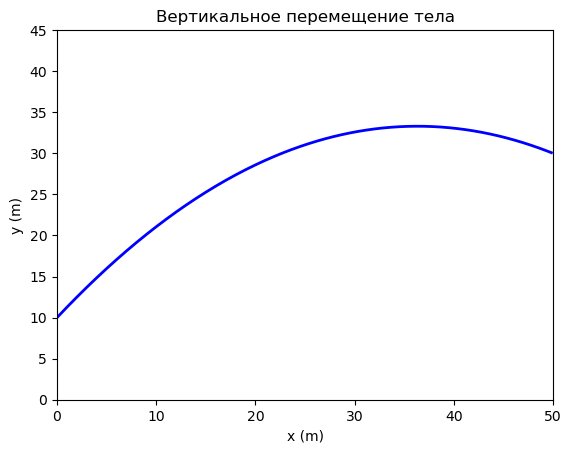

In [25]:
plt.figure()
plt.plot(s_x_list, s_y_list,'b-', lw=2)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([0, s_end, 0, h_end+15]);

При вызове функции plot из pyplot моджно использовать как списки, так и массивы:

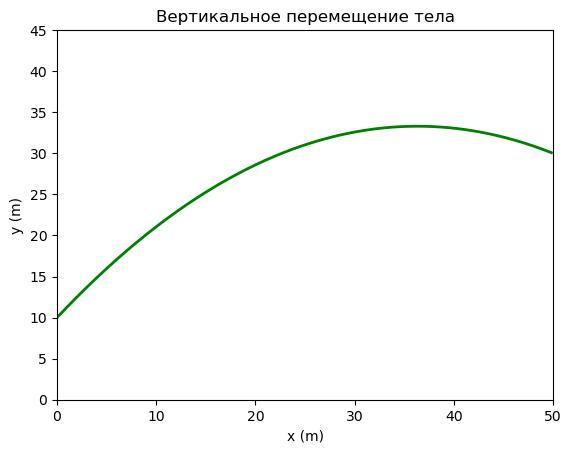

In [26]:
plt.figure()
plt.plot(s_x_array, s_y_array, color='green', lw=2)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')

# Альтернативный синтаксис для установки пределов по осям:
plt.xlim(0, s_end)
plt.ylim(0, h_end+15);

# Задание 1.2. Определение момента времени касания телом земли

Для задачи о педении тела из Задания 1.1 $\color{red}{найдём}$ момент времени касания телом земли (время нахождения тела в воздухе). Выполнения задания осуществим двумя  способами.

1. **Точное решение** задания: найдём время качания телом земли из решения уравнения $s_y(t)=0$;
2. **Приближённое решение** задания:
    - Построим последовательность $s_y$ на временном отрезке $[0, t_{stop}]$, чтобы момент качания тела земли $t*$ попадал в выбранный отрезок $t* \in [0, t_{step}]$. Отметим, что $t{stop} > T$, где значение $T$ задаётся в Задании 1.1.
    - Найдём в построенной последовательности $s_y$ два соседних элемента последовательности, значение которых меняют знак. Т. е. Найдём значение индекса $k$, для которого $s_y[k]s_y[k+1]<0$. Это будет означать, что $0 \in (s_y[k],s_y[k+1])$
    - Осуществим линейную интерполяцию (опять) $s_{lin}(t)$ функции $s_t(t)$ по двум точкам $(t[k],s_y[k]$ и $(t[k+1],s_y[k+1])$ для нахождения времени $t* \in (t[k],t[k+1])$ из условия $s_{lin}(t*)=0$. Другими словами, по координатам двух точек необходимо построить прямую линию и найти на этой прямой значени $t*$, соответствующее точке $(t*,0)$. $\color{red}{Приведём}$ в документе формулы для линейной интерполяции и для вычисления $t*$.
    
$\color{red}{Сравним}$ точное решение, полученное из решения квадратного уравнения, и приближённое решение t*.

## Выполнение Задания 1.2

### Первый способ выполнения задания (точный)

Для этого способа понадобится функция solve решающая уравнения. Для этого нам понадобится модуль sympy. Но предварительно необходимо будет создать символ относительно которого уравнение будет решаться.

Функция принимает уравнение, символ относительно которого решается уравнение, и дополнительные параметры.

In [27]:
t = sympy.symbols('t')
result = sympy.solve(h_start + v0_y*t - g*t**2/2, t)
result

[-0.426145366626468, 4.78576698393038]

Выберем последнее, т. к. квадратное уравнение может иметь два решения и второе т. к. второе всегда больше:

In [28]:
t_star_exact = result[-1]; t_star_exact

4.78576698393038

### Второй способ выполнения задания

Выберем конечное время

In [29]:
t_stop = T + 2; t_stop

5.0

Создадим список значений высот в разных промежутках времени:

In [30]:
step = 0.01
t_list = [i*step for i in range(int(t_stop/step))]
s_y = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Найдём два элемента на которых меняется знак высоты:

In [31]:
k = 0
for i, val in enumerate(s_y):
    if s_y[i]*s_y[i+1] < 0:
        k = i; break;

Проверим:

In [32]:
print({t_list[k], s_y[k]}, {t_list[k+1], s_y[k+1]})

{0.14721623666667938, 4.78} {-0.10826554916664577, 4.79}


Отлично, теперь подставим их в каноническое уравнение прямой, и найдём время пересечения нуля:

In [33]:
x = sympy.symbols('x')
result = sympy.solve((-s_y[k])/(s_y[k+1]-s_y[k])-(x-t_list[k])/(t_list[k+1]-t_list[k]), x)
t_star_round = result[-1]; t_star_round

4.78576229871688

И сравним значени с точным способом:

In [34]:
t_star_exact / t_star_round

1.00000097899001

Неплохое совпадение!

# Задание 1.3. Построение графиков функций

$\color{red}{Построим}$ графики функций на плоскости по координатам точек согласно варианту. Функция задана:

1. Полярным уравнением $\rho = \rho(\phi)$ в полярной системе координат $(\phi,\rho)$;

2. Параметрическим уравнениями $x=x(t), y=y(t)$ в декартовой системе координат $(x, y)$.

Построение графиков функций осуществляется по координатам точек графика. Для этого можно создать последовательность соответствеющих значений $y (\rho)$-координат точек графика функции.

## Выполнения Задания 1.3

#### Вариант 3 (Кардиоида):

$\rho = 2 a (1 - cos(\phi)), a \in R$

$x = arcsin (sit(t)), y = arccos(cos(t))$

Начнём со второй. Выберем определённые значения t для графика:

In [35]:
step = 0.01
t_min = -10; t_max = 10
t_list = [t_min + i*step for i in range(int((t_max - t_min) / step))]

Найдём список всех точек для каждого значения t:

In [36]:
x_list = [math.asin(math.sin(i)) for i in t_list]
y_list = [math.acos(math.cos(i)) for i in t_list]

И построим график:

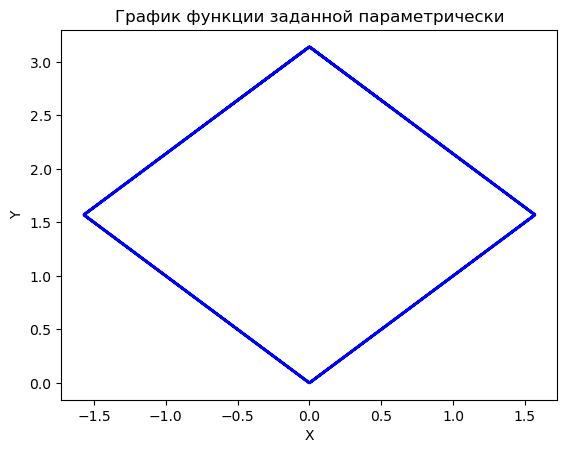

In [37]:
plt.figure()
plt.plot(x_list, y_list,'b-', lw=2)
plt.title('График функции заданной параметрически')
plt.xlabel('X'); plt.ylabel('Y');

А теперь функция кардиоида:

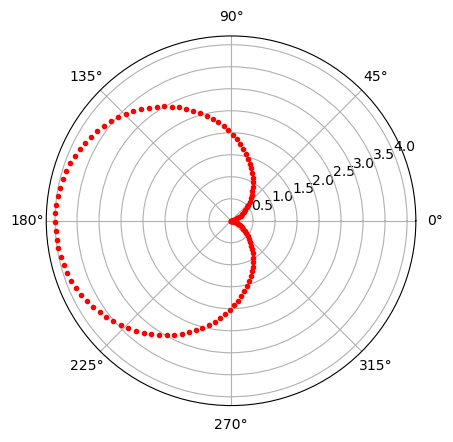

In [38]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(0, np.pi*2, 0.05)
a = 1
r = np.array([2 * a * (1 - math.cos(i)) for i in phi])
plt.plot(phi + (r<0)*np.pi,abs(r),'r.');

Вуаля, погнали дальше:

# Задание 1.4. Построение секущей, касательной и нормали к графику функции

$\color{red}{Постройте}$ в одной графической области:

- график траектории движения тела $(s_x(t),s_y(t))$ для $t\in [0, T]$ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через начальную точку при $t=0$ и конечную точку при $t=T$;
- график касательной прямой к траектории движения тела в начальной точке при $t=0$;
- график нормальной прямой к траектории движения тела в начальной точке при $t=0$.

Построение графиков функций осуществляется по координатам точек графика. Для этого нужно создать последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек графика функции. Для построения прямых линий используем только две точки.

## Выполнение Задания 1.4

Подготовим необходимые данные для построения секущей прямой к траектории движения тела.

Воспользуемся <i>векторно-параметричеким уравнением прямой</i> для заданной точки $p_{start}$, лежащей на прямой, т заданного направляющено вектора $a$.

<h5 align="center">$p(t)=p_{start}+a t$.</h5>

Направляющий вектор можно определить как $a = p_{end} - p_{start}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$.

Введём новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$ через их координаты. Для новых переменных используем тип массив ( ndarray ) из numpy. Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с координатами:

In [39]:
p_start = np.array([s_x_array[0], s_y_array[0]])
p_end = np.array([s_x_array[-1], s_y_array[-1]])
p_start, p_end

(array([ 0., 10.]), array([49.83333333, 30.07994275]))

Вычислим направляющий вектор:

In [40]:
a = p_end - p_start; a

array([49.83333333, 20.07994275])

Для построения графика прямой достаточно задания двух точек, лежащих на прямой:

In [41]:
p = [p_start + a * t for t in [-2,2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной графической области:

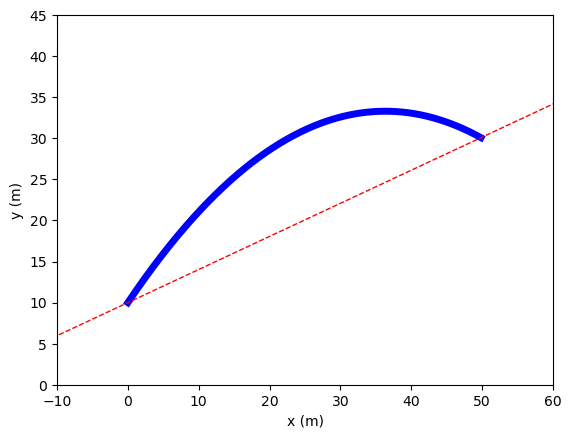

In [42]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)
plt.plot(p[:,0], p[:,1],'--', color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end + 10, 0, h_end + 15]);

$\color{red}{Построим}$ график касательной прямой к траектории движения тела в одной области с траекторией движения и секущей прямой. Для построения касательной прямой воспользуемся уравнением прямой по точке $p_{start}(x_{start},y_{start})$ и угловому коэффиценту $k$. $\color{red}{Поясним}$ как мы определяем угловой коэффицент $k$.

Первая точка касательной дана, это начало графика траектории, вторую найдём суммой первой с вектором $(1, k)$, коэффицент $k$ найдём следующим образом:

В задании 1.1 мы находили угол запуска тела который указывает угол касательной прямой в начальной точки траектории, а коэффицент $k$ как раз является тангенсом угла наклона прямой к оси $Ox$:

In [43]:
k_tan_start = math.tan(alpha); k_tan_start

1.2825984999999998

Найдём вторую точку прямой по вектору и совместим в один массив:

In [44]:
p_tan = [p_start + np.array([1,k_tan_start]) * t for t in [-10,100]]
p_tan = np.array(p_tan); p_tan

array([[-10.      ,  -2.825985],
       [100.      , 138.25985 ]])

Построим три графика:

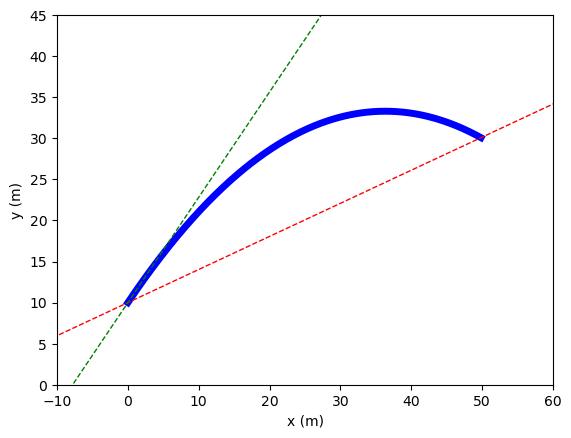

In [45]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)
plt.plot(p[:,0], p[:,1],'--', color='red',lw=1)
plt.plot(p_tan[:,0],p_tan[:,1],'--', color='green',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end + 10, 0, h_end + 15]);

$\color{red}{Построим}$ график нормальной прямой к траектории движения тела в момент времени $t = 0$ в одной графической области с траекторией движения, секущей прямой и касательной прямой. $\color{red}{Поясним}$ какой имеет вид уравнение нормальной прямой к траектории движения тела.

Прямую строим таким же образом, только перпендикулярно, тоесть одну из координат вектора умножаем на -1:

In [46]:
p_normal = [p_start + np.array([-k_tan_start,1]) * t for t in [-10,10]]
p_normal = np.array(p_normal)

Построим все графики вместе:

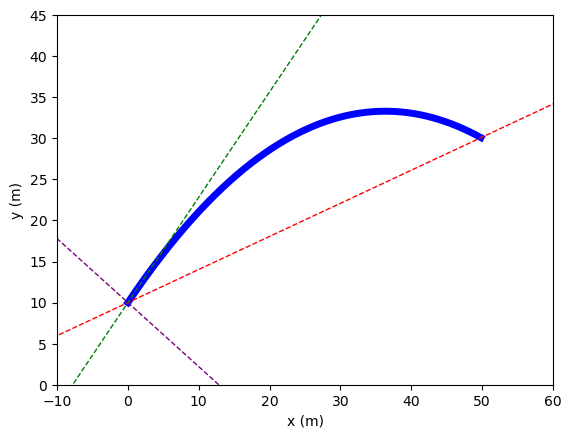

In [47]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'b-', lw=5)
plt.plot(p[:,0], p[:,1],'--', color='red',lw=1)
plt.plot(p_tan[:,0],p_tan[:,1],'--', color='green',lw=1)
plt.plot(p_normal[:,0],p_normal[:,1],'--', color='purple',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')

plt.axis([-10, s_end + 10, 0, h_end + 15]);